# Parameter estimation of FitzHugh-Nagumo model using optimisation methods

In [1]:
using ParameterizedFunctions, OrdinaryDiffEq, DiffEqParamEstim
using BlackBoxOptim, NLopt, Plots
gr(fmt=:png)

Plots.GRBackend()

In [13]:
loc_bounds = Tuple{Float64,Float64}[(0, 1), (0, 1), (0, 1), (0, 1)]
glo_bounds = Tuple{Float64,Float64}[(0, 5), (0, 5), (0, 5), (0, 5)]
loc_init = [0.5,0.5,0.5,0.5]
glo_init = [2.5,2.5,2.5,2.5]

4-element Array{Float64,1}:
 2.5
 2.5
 2.5
 2.5

In [2]:
fitz = @ode_def_nohes FitzhughNagumo begin
  dv = v - v^3/3 -w + l
  dw = τinv*(v +  a - b*w)
end a b τinv l

(::FitzhughNagumo) (generic function with 9 methods)

In [4]:
p = [0.7,0.8,0.08,0.5]              # Parameters used to construct the dataset
r0 = [1.0; 1.0]                     # initial value
tspan = (0.0, 30.0)                 # sample of 3000 observations over the (0,30) timespan
prob = ODEProblem(fitz, r0, tspan,p)
tspan2 = (0.0, 3.0)                 # sample of 300 observations with a timestep of 0.01
prob_short = ODEProblem(fitz, r0, tspan2,p)

DiffEqBase.ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 3.0)
u0: [1.0, 1.0]

In [5]:
dt = 30.0/3000                    
tf = 30.0
tinterval = 0:dt:tf
t  = collect(tinterval)

3001-element Array{Float64,1}:
  0.0 
  0.01
  0.02
  0.03
  0.04
  0.05
  0.06
  0.07
  0.08
  0.09
  0.1 
  0.11
  0.12
  ⋮   
 29.89
 29.9 
 29.91
 29.92
 29.93
 29.94
 29.95
 29.96
 29.97
 29.98
 29.99
 30.0 

In [6]:
h = 0.01
M = 300
tstart = 0.0
tstop = tstart + M * h
tinterval_short = 0:h:tstop
t_short = collect(tinterval_short)

301-element Array{Float64,1}:
 0.0 
 0.01
 0.02
 0.03
 0.04
 0.05
 0.06
 0.07
 0.08
 0.09
 0.1 
 0.11
 0.12
 ⋮   
 2.89
 2.9 
 2.91
 2.92
 2.93
 2.94
 2.95
 2.96
 2.97
 2.98
 2.99
 3.0 

In [7]:
#Generate Data 
data_sol_short = solve(prob_short,Vern9(),saveat=t_short,reltol=1e-9,abstol=1e-9)
data_short = convert(Array, data_sol_short) # This operation produces column major dataset obs as columns, equations as rows
data_sol = solve(prob,Vern9(),saveat=t,reltol=1e-9,abstol=1e-9)
data = convert(Array, data_sol)

2×3001 Array{Float64,2}:
 1.0  1.00166  1.00332  1.00497  1.00661  …  -0.65759   -0.655923  -0.654248
 1.0  1.00072  1.00144  1.00216  1.00289     -0.229157  -0.228976  -0.228793

#### Plot of the solution

##### Short Solution


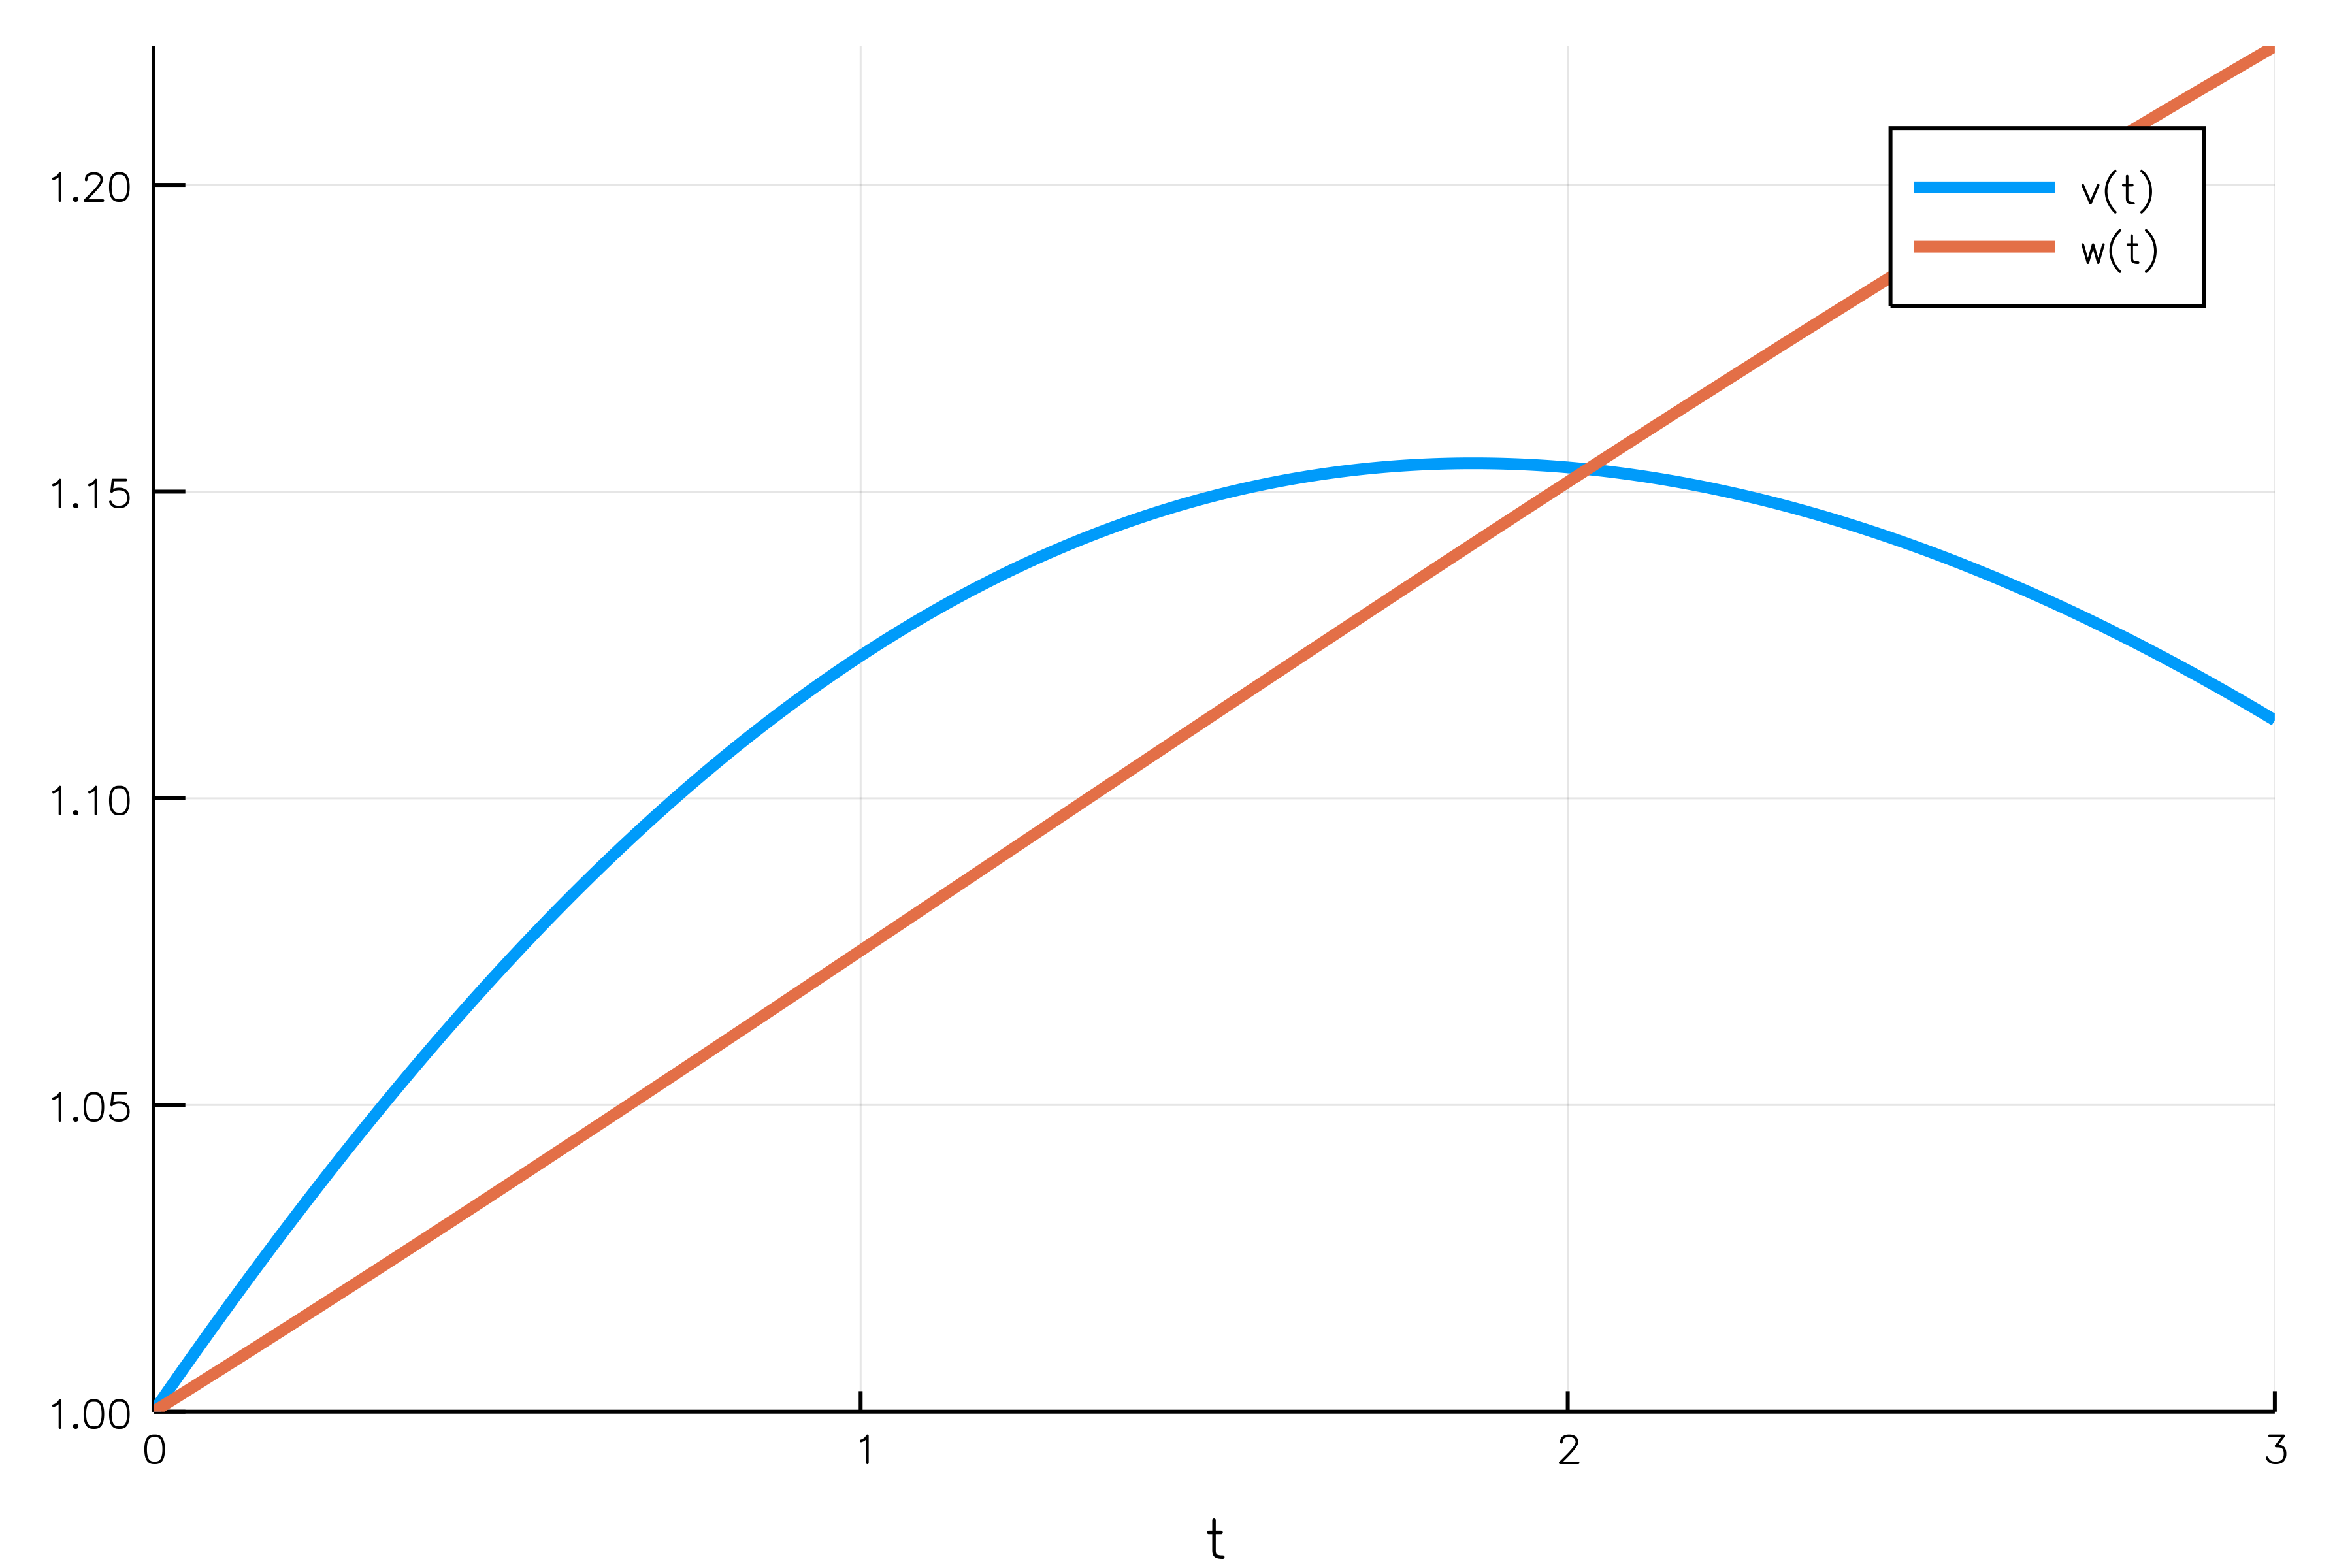

In [10]:
plot(data_sol_short)

##### Longer Solution


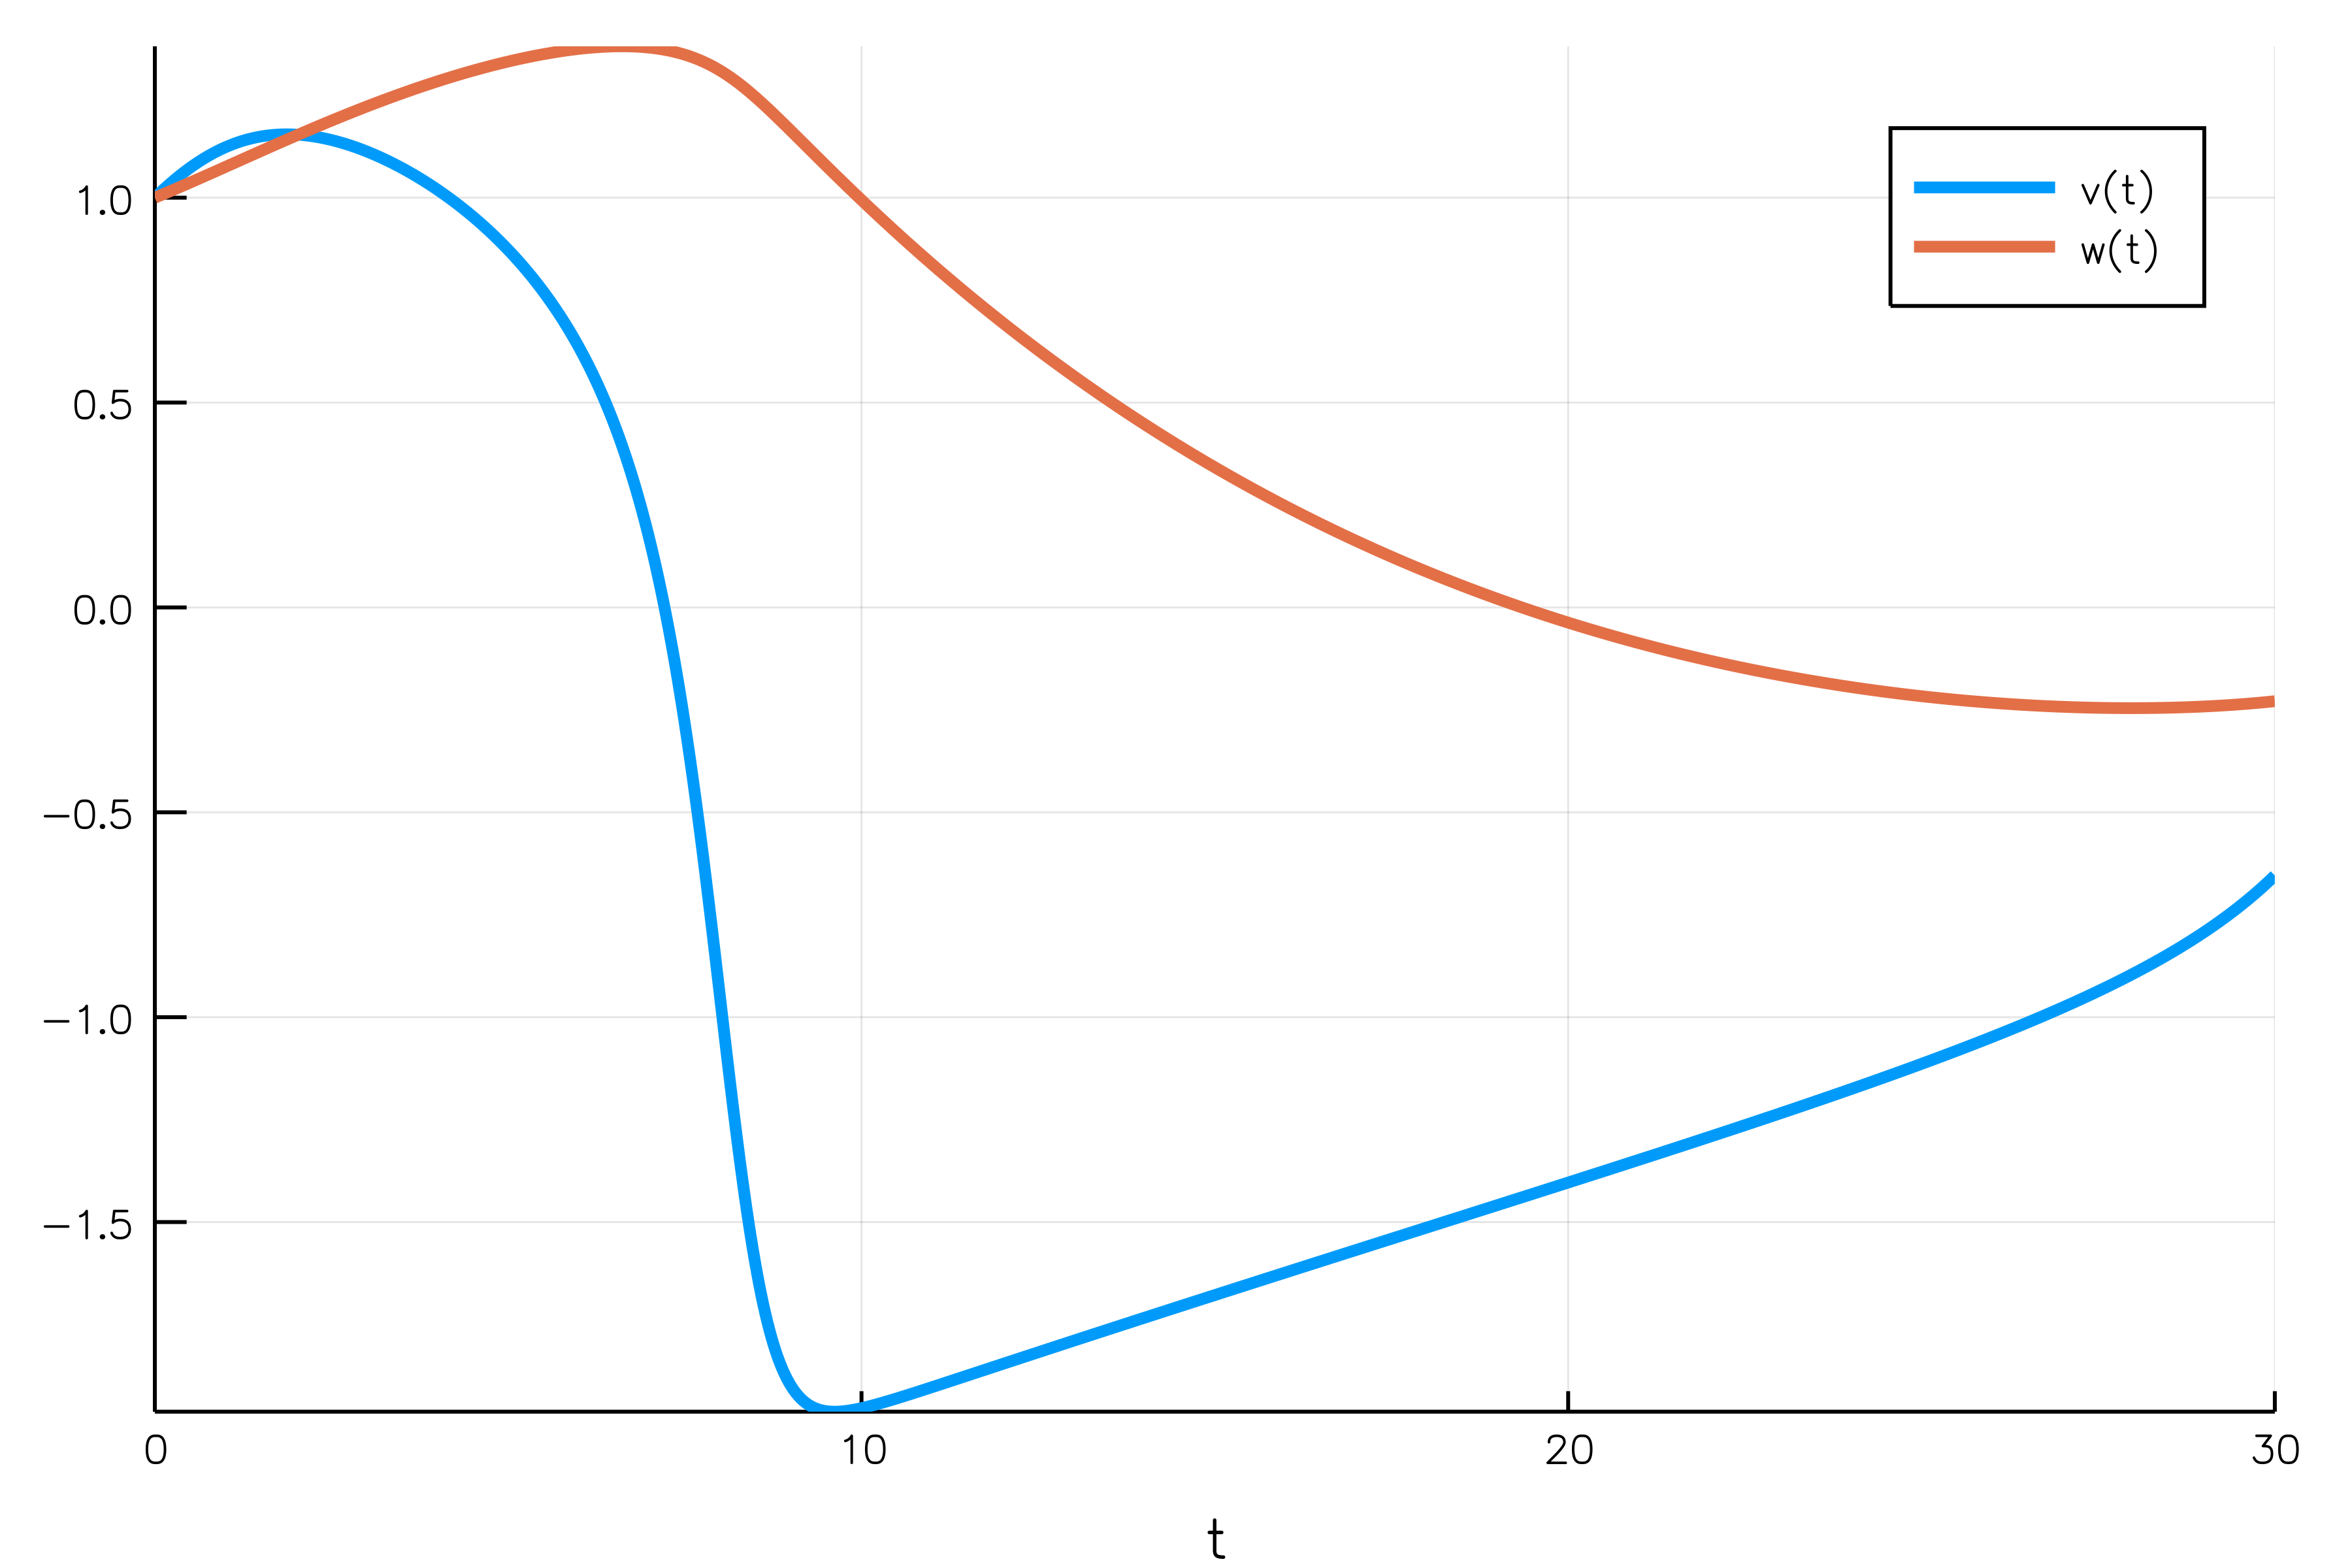

In [11]:
plot(data_sol)

## Local Solution from the short data set

In [14]:
obj_short = build_loss_objective(prob_short,Tsit5(),L2Loss(t_short,data_short),tstops=t_short)
res1 = bboptimize(obj_short;SearchRange = glo_bounds, MaxSteps = 7e3)
# Lower tolerance could lead to smaller fitness (more accuracy)

Starting optimization with optimizer BlackBoxOptim.DiffEvoOpt{BlackBoxOptim.FitPopulation{Float64},BlackBoxOptim.RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},BlackBoxOptim.RandomBound{BlackBoxOptim.RangePerDimSearchSpace}}
0.00 secs, 0 evals, 0 steps
0.50 secs, 284 evals, 202 steps, improv/step: 0.396 (last = 0.3960), fitness=0.649556501
1.00 secs, 635 evals, 524 steps, improv/step: 0.336 (last = 0.2981), fitness=0.649556501
1.50 secs, 1089 evals, 973 steps, improv/step: 0.293 (last = 0.2428), fitness=0.326064971
2.00 secs, 1495 evals, 1379 steps, improv/step: 0.254 (last = 0.1601), fitness=0.061090617
2.50 secs, 1947 evals, 1831 steps, improv/step: 0.228 (last = 0.1482), fitness=0.006048655
3.00 secs, 2390 evals, 2274 steps, improv/step: 0.206 (last = 0.1174), fitness=0.006048655
3.50 secs, 2807 evals, 2691 steps, improv/step: 0.197 (last = 0.1487), fitness=0.006048655
4.00 secs, 3231 evals, 3115 steps, improv/step: 0.186 (last = 0.1132), fitness=0.006048655
4.50 secs

BlackBoxOptim.OptimizationResults("adaptive_de_rand_1_bin_radiuslimited", "Max number of steps (7000) reached", 7001, 1.51915816278518e9, 8.556154012680054, BlackBoxOptim.DictChain{Symbol,Any}[BlackBoxOptim.DictChain{Symbol,Any}[Dict{Symbol,Any}(Pair{Symbol,Any}(:RngSeed, 227592),Pair{Symbol,Any}(:SearchRange, Tuple{Float64,Float64}[(0.0, 5.0), (0.0, 5.0), (0.0, 5.0), (0.0, 5.0)]),Pair{Symbol,Any}(:MaxSteps, 7000)),Dict{Symbol,Any}()],Dict{Symbol,Any}(Pair{Symbol,Any}(:FitnessScheme, BlackBoxOptim.ScalarFitnessScheme{true}()),Pair{Symbol,Any}(:NumDimensions, :NotSpecified),Pair{Symbol,Any}(:PopulationSize, 50),Pair{Symbol,Any}(:MaxTime, 0.0),Pair{Symbol,Any}(:SearchRange, (-1.0, 1.0)),Pair{Symbol,Any}(:Method, :adaptive_de_rand_1_bin_radiuslimited),Pair{Symbol,Any}(:MaxNumStepsWithoutFuncEvals, 100),Pair{Symbol,Any}(:RngSeed, 1234),Pair{Symbol,Any}(:MaxFuncEvals, 0),Pair{Symbol,Any}(:SaveTrace, false)…)], 7117, BlackBoxOptim.ScalarFitnessScheme{true}(), BlackBoxOptim.TopListArchiveOutp

In [15]:
obj_short = build_loss_objective(prob_short,Tsit5(),L2Loss(t_short,data_short),tstops=t_short,reltol=1e-9)
res1 = bboptimize(obj_short;SearchRange = glo_bounds, MaxSteps = 7e3)
# Change in tolerance makes it worse 

Starting optimization with optimizer BlackBoxOptim.DiffEvoOpt{BlackBoxOptim.FitPopulation{Float64},BlackBoxOptim.RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},BlackBoxOptim.RandomBound{BlackBoxOptim.RangePerDimSearchSpace}}
0.00 secs, 0 evals, 0 steps
0.50 secs, 458 evals, 378 steps, improv/step: 0.407 (last = 0.4074), fitness=1.174410699
1.00 secs, 883 evals, 803 steps, improv/step: 0.357 (last = 0.3129), fitness=0.512758168
1.50 secs, 1310 evals, 1230 steps, improv/step: 0.317 (last = 0.2412), fitness=0.113101274
2.00 secs, 1748 evals, 1668 steps, improv/step: 0.269 (last = 0.1324), fitness=0.060579644
2.50 secs, 2192 evals, 2112 steps, improv/step: 0.231 (last = 0.0878), fitness=0.016870011
3.01 secs, 2601 evals, 2521 steps, improv/step: 0.207 (last = 0.0831), fitness=0.016870011
3.51 secs, 3056 evals, 2976 steps, improv/step: 0.192 (last = 0.1077), fitness=0.016870011
4.01 secs, 3528 evals, 3448 steps, improv/step: 0.177 (last = 0.0847), fitness=0.001045496
4.51 sec

BlackBoxOptim.OptimizationResults("adaptive_de_rand_1_bin_radiuslimited", "Max number of steps (7000) reached", 7001, 1.51915817749816e9, 7.924338102340698, BlackBoxOptim.DictChain{Symbol,Any}[BlackBoxOptim.DictChain{Symbol,Any}[Dict{Symbol,Any}(Pair{Symbol,Any}(:RngSeed, 111046),Pair{Symbol,Any}(:SearchRange, Tuple{Float64,Float64}[(0.0, 5.0), (0.0, 5.0), (0.0, 5.0), (0.0, 5.0)]),Pair{Symbol,Any}(:MaxSteps, 7000)),Dict{Symbol,Any}()],Dict{Symbol,Any}(Pair{Symbol,Any}(:FitnessScheme, BlackBoxOptim.ScalarFitnessScheme{true}()),Pair{Symbol,Any}(:NumDimensions, :NotSpecified),Pair{Symbol,Any}(:PopulationSize, 50),Pair{Symbol,Any}(:MaxTime, 0.0),Pair{Symbol,Any}(:SearchRange, (-1.0, 1.0)),Pair{Symbol,Any}(:Method, :adaptive_de_rand_1_bin_radiuslimited),Pair{Symbol,Any}(:MaxNumStepsWithoutFuncEvals, 100),Pair{Symbol,Any}(:RngSeed, 1234),Pair{Symbol,Any}(:MaxFuncEvals, 0),Pair{Symbol,Any}(:SaveTrace, false)…)], 7081, BlackBoxOptim.ScalarFitnessScheme{true}(), BlackBoxOptim.TopListArchiveOutp

In [16]:
obj_short = build_loss_objective(prob_short,Vern9(),L2Loss(t_short,data_short),tstops=t_short,reltol=1e-9,abstol=1e-9)
res1 = bboptimize(obj_short;SearchRange = glo_bounds, MaxSteps = 7e3)
# using the moe accurate Vern9() reduces the fitness marginally and leads to some increase in time taken 

Starting optimization with optimizer BlackBoxOptim.DiffEvoOpt{BlackBoxOptim.FitPopulation{Float64},BlackBoxOptim.RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},BlackBoxOptim.RandomBound{BlackBoxOptim.RangePerDimSearchSpace}}
0.00 secs, 0 evals, 0 steps
0.50 secs, 413 evals, 305 steps, improv/step: 0.374 (last = 0.3738), fitness=1.271691214
1.00 secs, 820 evals, 700 steps, improv/step: 0.320 (last = 0.2785), fitness=0.412921329
1.50 secs, 1212 evals, 1092 steps, improv/step: 0.280 (last = 0.2092), fitness=0.283205286
2.00 secs, 1585 evals, 1465 steps, improv/step: 0.254 (last = 0.1769), fitness=0.238735276
2.50 secs, 1960 evals, 1840 steps, improv/step: 0.233 (last = 0.1520), fitness=0.052346803
3.01 secs, 2343 evals, 2223 steps, improv/step: 0.213 (last = 0.1175), fitness=0.052346803
3.51 secs, 2690 evals, 2570 steps, improv/step: 0.199 (last = 0.1095), fitness=0.052346803
4.01 secs, 3021 evals, 2901 steps, improv/step: 0.189 (last = 0.1118), fitness=0.052346803
4.51 sec

BlackBoxOptim.OptimizationResults("adaptive_de_rand_1_bin_radiuslimited", "Max number of steps (7000) reached", 7001, 1.519158606743914e9, 9.41792917251587, BlackBoxOptim.DictChain{Symbol,Any}[BlackBoxOptim.DictChain{Symbol,Any}[Dict{Symbol,Any}(Pair{Symbol,Any}(:RngSeed, 126445),Pair{Symbol,Any}(:SearchRange, Tuple{Float64,Float64}[(0.0, 5.0), (0.0, 5.0), (0.0, 5.0), (0.0, 5.0)]),Pair{Symbol,Any}(:MaxSteps, 7000)),Dict{Symbol,Any}()],Dict{Symbol,Any}(Pair{Symbol,Any}(:FitnessScheme, BlackBoxOptim.ScalarFitnessScheme{true}()),Pair{Symbol,Any}(:NumDimensions, :NotSpecified),Pair{Symbol,Any}(:PopulationSize, 50),Pair{Symbol,Any}(:MaxTime, 0.0),Pair{Symbol,Any}(:SearchRange, (-1.0, 1.0)),Pair{Symbol,Any}(:Method, :adaptive_de_rand_1_bin_radiuslimited),Pair{Symbol,Any}(:MaxNumStepsWithoutFuncEvals, 100),Pair{Symbol,Any}(:RngSeed, 1234),Pair{Symbol,Any}(:MaxFuncEvals, 0),Pair{Symbol,Any}(:SaveTrace, false)…)], 7121, BlackBoxOptim.ScalarFitnessScheme{true}(), BlackBoxOptim.TopListArchiveOutp

## Using NLopt

#### Global Optimisation 

In [17]:
obj_short = build_loss_objective(prob_short,Vern9(),L2Loss(t_short,data_short),tstops=t_short,reltol=1e-9,abstol=1e-9)

(::DiffEqObjective) (generic function with 2 methods)

In [18]:
opt = Opt(:GN_ORIG_DIRECT_L, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[5.0,5.0,5.0,5.0])
min_objective!(opt, obj_short.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,glo_init)

 12.363643 seconds (50.03 M allocations: 2.249 GiB, 7.17% gc time)


(0.11016600768053908, [0.192044, 1.13169, 1.11111, 0.509578], :XTOL_REACHED)

In [21]:
opt = Opt(:GN_CRS2_LM, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[5.0,5.0,5.0,5.0])
min_objective!(opt, obj_short.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,glo_init)

 12.927838 seconds (51.87 M allocations: 2.332 GiB, 7.22% gc time)


(3.367242024807242e-17, [0.7, 0.8, 0.08, 0.5], :MAXEVAL_REACHED)

In [22]:
opt = Opt(:GN_ISRES, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[5.0,5.0,5.0,5.0])
min_objective!(opt, obj_short.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,glo_init)

 13.342976 seconds (51.87 M allocations: 2.332 GiB, 7.02% gc time)


(0.02437623580519078, [4.75978, 4.35463, 0.0669989, 0.506918], :MAXEVAL_REACHED)

In [23]:
opt = Opt(:GN_ESCH, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[5.0,5.0,5.0,5.0])
min_objective!(opt, obj_short.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,glo_init)

 13.278316 seconds (51.87 M allocations: 2.332 GiB, 7.04% gc time)


(0.0020682772584276967, [0.0343605, 0.784501, 0.255948, 0.498647], :MAXEVAL_REACHED)

Now local optimization algorithms are used to check the global ones, these use the local constraints, different intial values and time step


In [24]:
opt = Opt(:LN_BOBYQA, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[1.0,1.0,1.0,1.0])
min_objective!(opt, obj_short.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,loc_init)

  3.203762 seconds (12.29 M allocations: 565.975 MiB, 6.98% gc time)


(5.28611876473971e-24, [0.7, 0.8, 0.08, 0.5], :SUCCESS)

In [25]:
opt = Opt(:LN_NELDERMEAD, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[1.0,1.0,1.0,1.0])
min_objective!(opt, obj_short.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,loc_init)

  1.265175 seconds (4.80 M allocations: 221.136 MiB, 6.70% gc time)


(8.965505337540987e-5, [1.0, 1.0, 0.0735509, 0.500405], :XTOL_REACHED)

In [26]:
opt = Opt(:LD_SLSQP, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[1.0,1.0,1.0,1.0])
min_objective!(opt, obj_short.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,loc_init)

  2.230445 seconds (8.63 M allocations: 397.294 MiB, 7.49% gc time)


(3.732246654524026e-14, [0.699986, 0.799998, 0.080001, 0.5], :XTOL_REACHED)

In [27]:
opt = Opt(:LN_COBYLA, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[1.0,1.0,1.0,1.0])
min_objective!(opt, obj_short.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,loc_init)

 13.683551 seconds (51.87 M allocations: 2.332 GiB, 7.11% gc time)


(0.0007533012926827143, [0.182327, 0.834403, 0.195088, 0.500362], :MAXEVAL_REACHED)

In [28]:
opt = Opt(:LN_NEWUOA_BOUND, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[1.0,1.0,1.0,1.0])
min_objective!(opt, obj_short.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,loc_init)

  0.494329 seconds (1.52 M allocations: 69.971 MiB, 5.02% gc time)


(0.00039238497760653583, [0.32114, 0.438199, 0.0787917, 0.499176], :SUCCESS)

In [29]:
opt = Opt(:LN_PRAXIS, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[1.0,1.0,1.0,1.0])
min_objective!(opt, obj_short.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,loc_init)

  1.193534 seconds (4.74 M allocations: 218.032 MiB, 7.23% gc time)


(4.889106962032095e-25, [0.7, 0.8, 0.08, 0.5], :SUCCESS)

In [30]:
opt = Opt(:LN_SBPLX, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[1.0,1.0,1.0,1.0])
min_objective!(opt, obj_short.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,loc_init)

 13.693126 seconds (51.87 M allocations: 2.332 GiB, 7.06% gc time)


(8.350546444056411e-15, [0.700007, 0.800002, 0.0799996, 0.5], :MAXEVAL_REACHED)

In [31]:
opt = Opt(:LD_MMA, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[1.0,1.0,1.0,1.0])
min_objective!(opt, obj_short.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,loc_init)

127.425836 seconds (466.77 M allocations: 20.984 GiB, 7.11% gc time)


(9.930463767834086e-5, [0.231856, 0.706134, 0.130932, 0.49972], :MAXEVAL_REACHED)

### Now the longer problem is solved for a global solution

Vern9 solver with reltol=1e-9 and abstol=1e-9 is used and the dataset is increased to 3000 observations per variable with the same integration time step of 0.01.


In [33]:
obj = build_loss_objective(prob,Vern9(),L2Loss(t,data),tstops=t,reltol=1e-9,abstol=1e-9)
res1 = bboptimize(obj;SearchRange = glo_bounds, MaxSteps = 4e3)

Starting optimization with optimizer BlackBoxOptim.DiffEvoOpt{BlackBoxOptim.FitPopulation{Float64},BlackBoxOptim.RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},BlackBoxOptim.RandomBound{BlackBoxOptim.RangePerDimSearchSpace}}
0.00 secs, 0 evals, 0 steps
0.51 secs, 48 evals, 25 steps, improv/step: 0.600 (last = 0.6000), fitness=3090.656755909
1.02 secs, 91 evals, 51 steps, improv/step: 0.588 (last = 0.5769), fitness=3090.656755909
1.53 secs, 135 evals, 81 steps, improv/step: 0.519 (last = 0.4000), fitness=2055.109177581
2.03 secs, 186 evals, 119 steps, improv/step: 0.471 (last = 0.3684), fitness=1069.715892654
2.54 secs, 235 evals, 159 steps, improv/step: 0.428 (last = 0.3000), fitness=1069.715892654
3.06 secs, 288 evals, 206 steps, improv/step: 0.388 (last = 0.2553), fitness=1069.715892654
3.56 secs, 341 evals, 256 steps, improv/step: 0.352 (last = 0.2000), fitness=1069.715892654
4.06 secs, 393 evals, 307 steps, improv/step: 0.339 (last = 0.2745), fitness=1069.715892654
4

BlackBoxOptim.OptimizationResults("adaptive_de_rand_1_bin_radiuslimited", "Max number of steps (4000) reached", 4001, 1.519159117081375e9, 42.36965203285217, BlackBoxOptim.DictChain{Symbol,Any}[BlackBoxOptim.DictChain{Symbol,Any}[Dict{Symbol,Any}(Pair{Symbol,Any}(:RngSeed, 689236),Pair{Symbol,Any}(:SearchRange, Tuple{Float64,Float64}[(0.0, 5.0), (0.0, 5.0), (0.0, 5.0), (0.0, 5.0)]),Pair{Symbol,Any}(:MaxSteps, 4000)),Dict{Symbol,Any}()],Dict{Symbol,Any}(Pair{Symbol,Any}(:FitnessScheme, BlackBoxOptim.ScalarFitnessScheme{true}()),Pair{Symbol,Any}(:NumDimensions, :NotSpecified),Pair{Symbol,Any}(:PopulationSize, 50),Pair{Symbol,Any}(:MaxTime, 0.0),Pair{Symbol,Any}(:SearchRange, (-1.0, 1.0)),Pair{Symbol,Any}(:Method, :adaptive_de_rand_1_bin_radiuslimited),Pair{Symbol,Any}(:MaxNumStepsWithoutFuncEvals, 100),Pair{Symbol,Any}(:RngSeed, 1234),Pair{Symbol,Any}(:MaxFuncEvals, 0),Pair{Symbol,Any}(:SaveTrace, false)…)], 4091, BlackBoxOptim.ScalarFitnessScheme{true}(), BlackBoxOptim.TopListArchiveOut

In [35]:
opt = Opt(:GN_ORIG_DIRECT_L, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[5.0,5.0,5.0,5.0])
min_objective!(opt, obj.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,glo_init)

 82.578816 seconds (432.97 M allocations: 15.548 GiB, 5.38% gc time)


(81.06091854762182, [1.11111, 1.11111, 0.100594, 0.576132], :XTOL_REACHED)

In [36]:
opt = Opt(:GN_CRS2_LM, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[5.0,5.0,5.0,5.0])
min_objective!(opt, obj.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 20000)
@time (minf,minx,ret) = NLopt.optimize(opt,glo_init)

 77.424527 seconds (405.69 M allocations: 14.568 GiB, 5.40% gc time)


(8.0991038192156165e-19, [0.7, 0.8, 0.08, 0.5], :XTOL_REACHED)

In [37]:
opt = Opt(:GN_ISRES, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[5.0,5.0,5.0,5.0])
min_objective!(opt, obj.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 50000)
@time (minf,minx,ret) = NLopt.optimize(opt,glo_init)

499.921195 seconds (2.66 G allocations: 95.468 GiB, 5.45% gc time)


(2.2266405914052664e-16, [0.7, 0.8, 0.08, 0.5], :MAXEVAL_REACHED)

In [38]:
opt = Opt(:GN_ESCH, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[5.0,5.0,5.0,5.0])
min_objective!(opt, obj.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 20000)
@time (minf,minx,ret) = NLopt.optimize(opt,glo_init)

200.707038 seconds (1.06 G allocations: 38.187 GiB, 5.40% gc time)


(422.2817022343704, [1.12256, 2.10409, 0.0557994, 0.281496], :MAXEVAL_REACHED)

In [39]:
opt = Opt(:LN_BOBYQA, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[1.0,1.0,1.0,1.0])
min_objective!(opt, obj.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,loc_init)

  4.248208 seconds (20.90 M allocations: 768.385 MiB, 5.18% gc time)


(8.090325025142272e-19, [0.7, 0.8, 0.08, 0.5], :XTOL_REACHED)

In [40]:
opt = Opt(:LN_NELDERMEAD, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[1.0,1.0,1.0,1.0])
min_objective!(opt, obj.cost_function2)
xtol_rel!(opt,1e-9)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,loc_init)

  5.438658 seconds (28.39 M allocations: 1.020 GiB, 5.59% gc time)


(3160.405522281567, [1.0, 1.0, 1.0, 0.865699], :XTOL_REACHED)

In [41]:
opt = Opt(:LD_SLSQP, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[1.0,1.0,1.0,1.0])
min_objective!(opt, obj.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,loc_init)

  2.374737 seconds (13.56 M allocations: 498.557 MiB, 5.74% gc time)


(3160.4056697694823, [1.0, 1.0, 1.0, 0.865765], :XTOL_REACHED)

As expected from other problems the longer sample proves to be extremely challenging for some of the global optimizers. A few give the accurate values, while others seem to struggle with accuracy a lot.


# Conclusion

It is observed that lower tolerance lead to higher accuracy but too low tolerance could affect the convergance time drastically. Also fitting a shorter timespan seems to be easier in comparision (quite intutively). NLOpt methods seem to give great accuracy in the shorter problem with a lot of the algorithms giving 0 fitness, BBO performs very well on it with marginal change with tol values. In case of global optimization of the longer problem there is some difference in the perfomance amongst the algorithms with :LN_BOBYQA giving accurate results for the local optimization and :GN_ISRES :GN_CRS2_LM in case of the global give the highest accuracy. BBO also fails to perform too well in the case of the longer problem.